In [1]:
# Dependencies
#from config import (census_key, gkey)
import gmaps
import numpy as np
import pandas as pd
import requests
import time
#from us import states
from scipy.stats import linregress
from matplotlib import pyplot as plt

In [2]:
#import baby name data
baby_name_original = pd.read_csv(
    "../Data/StateNames.csv", dtype="object", encoding="utf-8")
#display result
baby_name_original.head()

,Id,Name,Year,Gender,State,Count
0,1,Mary,1910,F,AK,14
1,2,Annie,1910,F,AK,12
2,3,Anna,1910,F,AK,10
3,4,Margaret,1910,F,AK,8
4,5,Helen,1910,F,AK,7


In [3]:
#clean up column formats for Count (float), Year (int), convert year to date in new column date_conv (datetime)
baby_name_original["Count"] = baby_name_original.Count.astype(float)
baby_name_original["Year"] = baby_name_original["Year"].astype(int)
baby_name_original['date_conv'] = pd.to_datetime(baby_name_original.Year)

In [4]:
#look for null values
baby_name_original.isnull().sum()

Id           0
Name         0
Year         0
Gender       0
State        0
Count        0
date_conv    0
dtype: int64

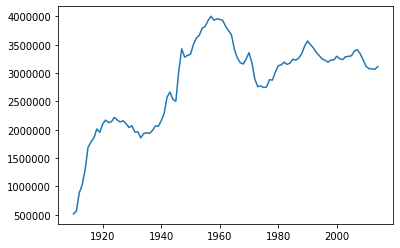

In [5]:
plt.plot(baby_name_original.groupby(['Year']).agg({'Count':np.sum}))

In [13]:
#add a new column for Decade
baby_name_new = baby_name_original.copy()
baby_name_new.set_index('Id', inplace=True)
#baby_name_new["Year"] = baby_name_new["Year"].astype(int)
baby_name_new['Decade'] = ((baby_name_new['Year']//10)*10)
#baby_name_new = baby_name_new.reset_index(drop=True)
baby_name_new

,Name,Year,Gender,State,Count,date_conv,Decade
Id,,,,,,,
1,Mary,1910,F,AK,14.0,1970-01-01 00:00:00.000001910,1910
2,Annie,1910,F,AK,12.0,1970-01-01 00:00:00.000001910,1910
3,Anna,1910,F,AK,10.0,1970-01-01 00:00:00.000001910,1910
4,Margaret,1910,F,AK,8.0,1970-01-01 00:00:00.000001910,1910
5,Helen,1910,F,AK,7.0,1970-01-01 00:00:00.000001910,1910
...,...,...,...,...,...,...,...
5647422,Seth,2014,M,WY,5.0,1970-01-01 00:00:00.000002014,2010
5647423,Spencer,2014,M,WY,5.0,1970-01-01 00:00:00.000002014,2010
5647424,Tyce,2014,M,WY,5.0,1970-01-01 00:00:00.000002014,2010


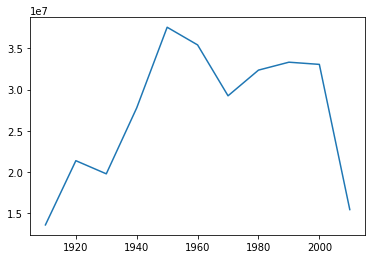

In [10]:
plt.plot(baby_name_new.groupby(['Decade']).agg({'Count':np.sum}))

In [22]:
GenderNameGB = baby_name_new.groupby(['Gender', 'Year'])['Count'].sum()
GenderNameGBDF = pd.DataFrame(GenderNameGB)
GenderNameGBDF

Count
Gender Year           
F      1910   352089.0
       1911   372371.0
       1912   504283.0
       1913   566950.0
       1914   696886.0
...                ...
M      2010  1677202.0
       2011  1656606.0
       2012  1651838.0
       2013  1647092.0
       2014  1667352.0

[210 rows x 1 columns]

In [53]:
GenderNameGBDF.rename(index={0: "Gender", 1: "Year", 2: "Count"})
GenderNameGBDFX = GenderNameGBDF.unstack()
GenderNameGBDFX

#x = baby_name_new.Year.unique()
#y1 = GenderNameGBDFX.iloc[0]
#y2 = GenderNameGBDFX.iloc[1]


#multi_plot = GenderNameGBDF.plot(kind="line", figsize=(15, 10))

#GenderNameGBDFX.columns = GenderNameGBDFX.columns.droplevel()
#bar multi plot
#multi_plot = GenderNameGBDFX.plot(kind="line", figsize=(15, 10))
#label chart
#multi_plot.set_title("Names Per Gender Per Year")
#multi_plot.set_xlabel('Year')
#multi_plot.set_ylabel('Names')
#multi_plot.legend(ncol=2)

Count                                                              \
Year        1910      1911      1912      1913      1914      1915      1916   
Gender                                                                         
F       352089.0  372371.0  504283.0  566950.0  696886.0  908543.0  965971.0   
M       164229.0  193439.0  383701.0  461603.0  596436.0  781479.0  820539.0   

                                         ...                                   \
Year         1917       1918       1919  ...       2005       2006       2007   
Gender                                   ...                                    
F       1000429.0  1073241.0  1047125.0  ...  1528165.0  1564886.0  1576648.0   
M        855267.0   940140.0   907709.0  ...  1777150.0  1822851.0  1835769.0   

                                                                          \
Year         2008       2009       2010       2011       2012       2013   
Gender                                                                     
F       1544411.0  1493172.0  1439346.0  1422539.0  1422020.0  1419351.0   
M       1795907.0  1738944.0  1677202.0  1656606.0  1651838.0  1647092.0   

                   
Year         2014  
Gender             
F       1446259.0  
M       1667352.0  

[2 rows x 105 columns]

In [7]:
decade = decadeGB.index
totalNames = decadeGB["Count"]

decadeGroupDF = pd.DataFrame({"Decade": decade, "Total Names": totalNames})
decadeGroupDF = decadeGroupDF.reset_index(drop=True)
decadeGroupDF

NameError: name 'decadeGB' is not defined

In [ ]:
x_axis = decadeGroupDF.Decade
y_axis = decadeGroupDF['Total Names']
plt.bar(x_axis, y_axis, align="center")
#plt.bar(x_axis, y_axis, color='r', alpha=0.5, align="center")
#plt.ylim(0, max(y_axis)+50000)

In [ ]:
namesPerYear = baby_name_original.groupby("Year")

#plt.(namesPerYear[])

In [ ]:
BabyNameGB = baby_name_original.groupby("Name")
BabyName = BabyNameGB.count().index
NameCount = BabyNameGB["Count"].sum()

TopNameGB = pd.DataFrame({"Name": BabyName, "Popularity": NameCount
                             })


In [ ]:
#TopNameGB.sort_values(by=['Popularity'])

TopName = TopNameGB.sort_values(by=['Popularity'], ascending=False)

TopName.head()